In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import yfinance as yf
from matplotlib import cm
from matplotlib.collections import LineCollection
from scipy.cluster.hierarchy import dendrogram, fcluster, leaders
from six.moves.urllib.parse import urlencode
from six.moves.urllib.request import urlopen
from sklearn import cluster, covariance, manifold
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import pairwise_distances

In [2]:
tsla_df = yf.download('TSLA', start='2019-01-01', 
                      end='2019-12-31', progress=False)
tsla_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-12-31,337.790009,339.209991,325.260010,332.799988,332.799988,6302300
2019-01-02,306.100006,315.130005,298.799988,310.119995,310.119995,11658600
2019-01-03,307.000000,309.399994,297.380005,300.359985,300.359985,6965200
2019-01-04,306.000000,318.000000,302.730011,317.690002,317.690002,7394100
2019-01-07,321.720001,336.739990,317.750000,334.959991,334.959991,7551200


In [3]:
jpm_df = yf.download('JPM', start='2019-01-01', 
                      end='2019-12-31', progress=False)
jpm_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-12-31,97.589996,98.809998,96.769997,97.620003,93.093178,13237200
2019-01-02,95.949997,99.779999,95.940002,99.309998,94.704803,15670900
2019-01-03,98.639999,98.889999,96.690002,97.110001,93.358879,16286400
2019-01-04,99.110001,100.930000,98.279999,100.690002,96.800606,16935200
2019-01-07,100.430000,101.470001,99.709999,100.760002,96.867889,15430700


In [4]:
start_date='2003-01-01'
end_date='2008-01-01'

In [5]:
symbol_dict = {
    'TOT': 'Total',
    'XOM': 'Exxon',
    'CVX': 'Chevron',
    'COP': 'ConocoPhillips',
    'VLO': 'Valero Energy',
    'MSFT': 'Microsoft',
    'IBM': 'IBM',
    'TWX': 'Time Warner',
    'CMCSA': 'Comcast',
    'HPQ': 'HP',
    'AMZN': 'Amazon',
    'TM': 'Toyota',
    'CAJ': 'Canon',
    'SNE': 'Sony',
    'F': 'Ford',
    'HMC': 'Honda',
    'NAV': 'Navistar',
    'NOC': 'Northrop Grumman',
    'BA': 'Boeing',
    'KO': 'Coca Cola',
    'MMM': '3M',
    'MCD': 'McDonald\'s',
    'PEP': 'Pepsi',
    'K': 'Kellogg',
    'UN': 'Unilever',
    'MAR': 'Marriott',
    'PG': 'Procter Gamble',
    'CL': 'Colgate-Palmolive',
    'GE': 'General Electrics',
    'WFC': 'Wells Fargo',
    'JPM': 'JPMorgan Chase',
    'AIG': 'AIG',
    'AXP': 'American express',
    'BAC': 'Bank of America',
    'GS': 'Goldman Sachs',
    'AAPL': 'Apple',
    'SAP': 'SAP',
    'CSCO': 'Cisco',
    'TXN': 'Texas Instruments',
    'XRX': 'Xerox',
    'WMT': 'Wal-Mart',
    'HD': 'Home Depot',
    'GSK': 'GlaxoSmithKline',
    'PFE': 'Pfizer',
    'SNY': 'Sanofi-Aventis',
    'NVS': 'Novartis',
    'KMB': 'Kimberly-Clark',
    'R': 'Ryder',
    'GD': 'General Dynamics',
    'RTN': 'Raytheon',
    'CVS': 'CVS',
    'CAT': 'Caterpillar',
    'DD': 'DuPont de Nemours'}

In [6]:
symbols, names = np.array(sorted(symbol_dict.items())).T

In [7]:
quotes = []

for company in symbol_dict:
    company_df = yf.download(company, start=start_date, end=end_date, progress=False).dropna()
    quotes.append(company_df)

In [8]:
close_prices = np.vstack([q['Close'] for q in quotes])
open_prices = np.vstack([q['Open'] for q in quotes])

# The daily variations of the quotes are what carry most information
variation = close_prices - open_prices

In [9]:
# #############################################################################
# Learn a graphical structure from the correlations
edge_model = covariance.GraphicalLassoCV()

# standardize the time series: using correlations rather than covariance
# is more efficient for structure recovery
X = variation.copy().T
X /= X.std(axis=0)
edge_model.fit(X)

/home/local/EC/andreas.merentitis/anaconda3/envs/py38/lib/python3.8/site-packages/sklearn/covariance/_graph_lasso.py:261: ConvergenceWarning: graphical_lasso: did not converge after 100 iteration: dual gap: -1.855e-04
  warnings.warn('graphical_lasso: did not converge after '


GraphicalLassoCV(alphas=4, assume_centered=False, cv=None, enet_tol=0.0001,
                 max_iter=100, mode='cd', n_jobs=None, n_refinements=4,
                 tol=0.0001, verbose=False)

In [10]:
# #############################################################################
# Cluster using Agglomerative Clustering

#metric = "cosine"
#metric = "euclidean"
metric = "cityblock"
n_clusters = 14

model = AgglomerativeClustering(n_clusters=n_clusters, linkage="average", affinity=metric)
model.fit(edge_model.covariance_)

labels = model.labels_
n_labels = labels.max()

for i in range(n_labels + 1):
    print('Cluster %i: %s' % ((i + 1), ', '.join(names[labels == i])))

Cluster 1: Bank of America, Canon, Microsoft, Procter Gamble, SAP, Sony
Cluster 2: Marriott, McDonald's, 3M, Navistar, Northrop Grumman, Novartis
Cluster 3: Home Depot, Kellogg, Unilever, Exxon, Xerox
Cluster 4: Sanofi-Aventis, Toyota, Time Warner
Cluster 5: GlaxoSmithKline, HP, IBM, Kimberly-Clark, Texas Instruments
Cluster 6: Honda, Coca Cola, Wal-Mart
Cluster 7: Caterpillar, Colgate-Palmolive, Comcast, Ryder
Cluster 8: Apple
Cluster 9: Cisco, CVS, Chevron, Ford, JPMorgan Chase, Pfizer
Cluster 10: AIG, Amazon, American express
Cluster 11: Total
Cluster 12: ConocoPhillips, DuPont de Nemours, General Dynamics, Pepsi, Raytheon
Cluster 13: Boeing
Cluster 14: General Electrics, Goldman Sachs, Valero Energy, Wells Fargo


In [11]:
# #############################################################################
# Find a low-dimension embedding for visualization: find the best position of
# the nodes (the stocks) on a 2D plane

# We use a dense eigen_solver to achieve reproducibility (arpack is
# initiated with random vectors that we don't control). In addition, we
# use a large number of neighbors to capture the large-scale structure.
node_position_model = manifold.LocallyLinearEmbedding(
    n_components=2, eigen_solver='dense', n_neighbors=6)

embedding = node_position_model.fit_transform(X.T).T

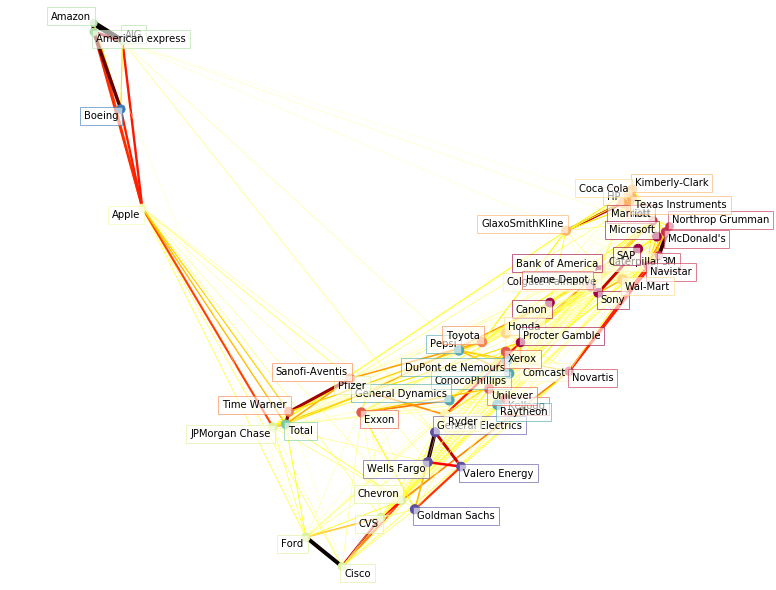

In [12]:
# #############################################################################
# Visualization
plt.figure(1, facecolor='w', figsize=(10, 8))
plt.clf()
ax = plt.axes([0., 0., 1., 1.])
plt.axis('off')

# Display a graph of the partial correlations
partial_correlations = edge_model.precision_.copy()
d = 1 / np.sqrt(np.diag(partial_correlations))
partial_correlations *= d
partial_correlations *= d[:, np.newaxis]
non_zero = (np.abs(np.triu(partial_correlations, k=1)) > 0.02)

# Plot the nodes using the coordinates of our embedding
cmap = cm.get_cmap("Spectral")
plt.scatter(embedding[0], embedding[1], s=100 * d ** 2, c=labels,
            cmap=cmap)

# Plot the edges
start_idx, end_idx = np.where(non_zero)
# a sequence of (*line0*, *line1*, *line2*), where::
#            linen = (x0, y0), (x1, y1), ... (xm, ym)
segments = [[embedding[:, start], embedding[:, stop]]
            for start, stop in zip(start_idx, end_idx)]
values = np.abs(partial_correlations[non_zero])
lc = LineCollection(segments,
                    zorder=0, cmap=plt.cm.hot_r,
                    norm=plt.Normalize(0, .7 * values.max()))
lc.set_array(values)
lc.set_linewidths(15 * values)
ax.add_collection(lc)

# Add a label to each node. The challenge here is that we want to
# position the labels to avoid overlap with other labels
for index, (name, label, (x, y)) in enumerate(
        zip(names, labels, embedding.T)):

    dx = x - embedding[0]
    dx[index] = 1
    dy = y - embedding[1]
    dy[index] = 1
    this_dx = dx[np.argmin(np.abs(dy))]
    this_dy = dy[np.argmin(np.abs(dx))]
    if this_dx > 0:
        horizontalalignment = 'left'
        x = x + .002
    else:
        horizontalalignment = 'right'
        x = x - .002
    if this_dy > 0:
        verticalalignment = 'bottom'
        y = y + .002
    else:
        verticalalignment = 'top'
        y = y - .002
    plt.text(x, y, name, size=10,
             horizontalalignment=horizontalalignment,
             verticalalignment=verticalalignment,
             bbox=dict(facecolor='w',
                       edgecolor=cmap(label / float(n_labels)),
                       alpha=.6))

plt.xlim(embedding[0].min() - .15 * embedding[0].ptp(),
         embedding[0].max() + .10 * embedding[0].ptp(),)
plt.ylim(embedding[1].min() - .03 * embedding[1].ptp(),
         embedding[1].max() + .03 * embedding[1].ptp())

plt.show()